In [75]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
train = pd.read_csv('C:/Users/손은주/TAVE/dacon_bus_dataset/train.csv',sep=',')
test = pd.read_csv('C:/Users/손은주/TAVE/dacon_bus_dataset/test.csv',sep=',')
submission = pd.read_csv('C:/Users/손은주/TAVE/dacon_bus_dataset/submission_제출양식.csv',sep=',')

date: 년월은 같으므로 일자 뽑아내기 & 요일 뽑아내기
route_id: 제거
route_nm, distance은 뭘까
vh_id : 제거
now_station, next_station은 위도 경도 있으니까 굳이 필요없음

In [76]:
# date column을 pandas의 datetime 타입으로 변경
train['date'] = train.date.apply(pd.to_datetime)

# datetime 타입에서 년,월,일,시간 추출
train['year']=train.date.apply(lambda x:x.year)
train['month']=train.date.apply(lambda x:x.month)
train['day']=train.date.apply(lambda x:x.day)

# day칼럼을 휴일이면 0, 평일이면 1로 categorical로 변경
train.loc[train['day'].isin([19,20,26,27]), 'day'] = 0
train.loc[train['day'].isin([19,20,26,27])==False, 'day'] = 1
train.head()

# year, month칼럼은 모두 2019년 10월로 공통값이므로 drop
drop_columns=['date', 'year', 'month']
train.drop(drop_columns, axis=1,inplace=True)

In [77]:
train.tail(30)
train_1 = train.drop(['id','route_id','vh_id','next_station','now_station'],axis=1,inplace=False)
train_1.head()

route_nm  now_latitude  now_longitude now_arrive_time  distance  \
0    360-1     33.456267     126.551750             06시     266.0   
1    360-1     33.457724     126.554014             06시     333.0   
2    360-1     33.458783     126.557353             06시     415.0   
3    360-1     33.479705     126.543811             06시     578.0   
4    360-1     33.485662     126.494923             07시     374.0   

   next_latitude  next_longitude  next_arrive_time  day  
0      33.457724      126.554014                24    1  
1      33.458783      126.557353                36    1  
2      33.459893      126.561624                40    1  
3      33.484860      126.542928                42    1  
4      33.485822      126.490897                64    1

In [102]:
train_1['arrive_hour']    = train_1['now_arrive_time'].str.replace(pat='시', repl='', regex=False)
train_1.astype({'next_arrive_time':'float'})

route_nm  now_latitude  now_longitude now_arrive_time  distance  \
0         360-1     33.456267     126.551750             06시     266.0   
1         360-1     33.457724     126.554014             06시     333.0   
2         360-1     33.458783     126.557353             06시     415.0   
3         360-1     33.479705     126.543811             06시     578.0   
4         360-1     33.485662     126.494923             07시     374.0   
5         360-1     33.478867     126.483833             07시     417.0   
6         360-1     33.478850     126.488350             07시     334.0   
7         360-1     33.482142     126.483213             07시     341.0   
8         360-1     33.483446     126.480758             07시     185.0   
9         360-1     33.485854     126.480530             07시     252.0   
10        360-1     33.488046     126.483112             07시     322.0   
11        360-1     33.489633     126.486000             08시     291.0   
12        360-1     33.489900     126.488917             08시     381.0   
13        360-1     33.487531     126.489892             08시     267.0   
14        360-1     33.485822     126.490897             08시     374.0   
15        360-1     33.485662     126.494923             08시     321.0   
16        360-1     33.487317     126.496617             08시     455.0   
17        360-1     33.491433     126.496783             08시     528.0   
18        360-1     33.500133     126.507000             08시     375.0   
19        360-1     33.500045     126.511035             08시     354.0   
20        360-1     33.499930     126.514863             08시     262.0   
21        360-1     33.499793     126.517687             08시     333.0   
22        360-1     33.499683     126.521267             08시     232.0   
23        360-1     33.499789     126.523759             08시     193.0   
24        360-1     33.500017     126.525833             08시     459.0   
25        360-1     33.499560     126.529771             08시     454.0   
26        360-1     33.496007     126.532287             08시     414.0   
27        360-1     33.493109     126.535091             08시     525.0   
28        360-1     33.479705     126.543811             08시     355.0   
29        360-1     33.476533     126.544283             08시     350.0   
...         ...           ...            ...             ...       ...   
210427    281-2     33.337375     126.610970             18시    7185.0   
210428    281-2     33.385117     126.620490             18시    4397.0   
210429    281-2     33.419380     126.616785             18시    1031.0   
210430    281-2     33.438628     126.569447             18시     274.0   
210431    281-2     33.440282     126.567532             18시    1121.0   
210432    281-2     33.445713     126.558430             18시     374.0   
210433    281-2     33.447993     126.555583             18시     676.0   
210434    281-2     33.452636     126.551640             18시     460.0   
210435    281-2     33.456733     126.551050             18시     635.0   
210436    281-2     33.469161     126.547770             18시     251.0   
210437    281-2     33.470643     126.545821             18시     275.0   
210438    281-2     33.473079     126.545689             18시     328.0   
210439    281-2     33.475900     126.544900             18시     424.0   
210440    281-2     33.479570     126.543882             18시     633.0   
210441    281-2     33.485199     126.542896             18시     545.0   
210442    281-2     33.489018     126.539199             18시     655.0   
210443    281-2     33.493625     126.534764             18시     272.0   
210444    281-2     33.495540     126.532907             18시     447.0   
210445    281-2     33.498925     126.530351             18시     418.0   
210446    281-2     33.500473     126.527103             18시     140.0   
210447    281-2     33.499916     126.521348             18시     541.0   
210448    281-2     33.495540     126.532907             20시     272.0   
210449    2

In [103]:
train_1['avg_time'] = train_1.groupby(['arrive_hour'])['next_arrive_time'].transform('mean')

In [104]:
#next_arrive_time/avg_time 을 하면 전체 같은 시간 중 그 날 걸린 시간의 비율이 나타남 
train_1['time_ratio'] = train_1['avg_time'] / train_1['next_arrive_time']
train_2 = train_1.drop(['avg_time','now_arrive_time'],axis=1)

In [105]:
train_2.head()

route_nm  now_latitude  now_longitude  distance  next_latitude  \
0    360-1     33.456267     126.551750     266.0      33.457724   
1    360-1     33.457724     126.554014     333.0      33.458783   
2    360-1     33.458783     126.557353     415.0      33.459893   
3    360-1     33.479705     126.543811     578.0      33.484860   
4    360-1     33.485662     126.494923     374.0      33.485822   

   next_longitude  next_arrive_time  day arrive_hour  time_ratio  
0      126.554014                24    1          06    3.582768  
1      126.557353                36    1          06    2.388512  
2      126.561624                40    1          06    2.149661  
3      126.542928                42    1          06    2.047296  
4      126.490897                64    1          07    1.335761

In [106]:
# arrive_hour 원핫인코딩
train_one = pd.get_dummies(train_2, columns=['arrive_hour'])

In [107]:
train_one.head()

route_nm  now_latitude  now_longitude  distance  next_latitude  \
0    360-1     33.456267     126.551750     266.0      33.457724   
1    360-1     33.457724     126.554014     333.0      33.458783   
2    360-1     33.458783     126.557353     415.0      33.459893   
3    360-1     33.479705     126.543811     578.0      33.484860   
4    360-1     33.485662     126.494923     374.0      33.485822   

   next_longitude  next_arrive_time  day  time_ratio  arrive_hour_00  ...  \
0      126.554014                24    1    3.582768               0  ...   
1      126.557353                36    1    2.388512               0  ...   
2      126.561624                40    1    2.149661               0  ...   
3      126.542928                42    1    2.047296               0  ...   
4      126.490897                64    1    1.335761               0  ...   

   arrive_hour_14  arrive_hour_15  arrive_hour_16  arrive_hour_17  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   arrive_hour_18  arrive_hour_19  arrive_hour_20  arrive_hour_21  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   arrive_hour_22  arrive_hour_23  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 29 columns]

In [108]:
train_2['route_nm'].value_counts() #365,281,360,201 4가지 원핫인코딩 가능

365-22    31941
281-2     25884
360-1     21668
281-1     19150
201-16    15451
201-14    12999
201-12    11871
365-21    11826
360-12     8037
201-11     7895
201-22     7723
360-2      7709
201-27     5950
201-17     5102
201-21     2670
201-26     2665
201-13     2631
201-18     2558
201-24     2368
201-15     2289
360-7      2070
Name: route_nm, dtype: int64

In [109]:
# 현재 위도, 경도 칼럼만 추출하여 DataFrame만들기
train_now_df = train_one.loc[:, ['now_longitude', 'now_latitude']]

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_now_df)
train_now_scaled = scaler.transform(train_now_df)

train_now_df_scaled = pd.DataFrame(data = train_now_scaled, columns =['now_longitude', 'now_latitude'] )
train_now_df_scaled.head()

now_longitude  now_latitude
0      -0.417071      0.212397
1      -0.398807      0.226633
2      -0.371871      0.236980
3      -0.481115      0.441397
4      -0.875497      0.499600

In [111]:
from sklearn.cluster import KMeans

# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters = 8, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(train_now_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

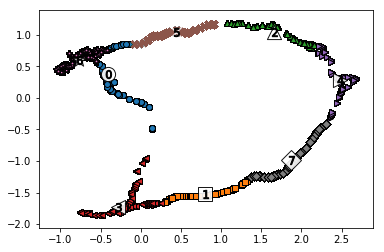

In [129]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_now_df_scaled['cluster'] = kmeans.labels_

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(kmeans.labels_)
markers = ['o', 's', '^', '<', '>', 'x', '*', 'D','+']

# 군집된 label 유형별로 scatter plot시행
for label in unique_labels:
    label_cluster = train_now_df_scaled[train_now_df_scaled['cluster']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['now_longitude'], y=label_cluster['now_latitude'], edgecolor='k', marker=markers[label])

    # 군집별 중심위치
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

In [130]:
# 위도, 경도로 군집화 한 결과를 원본 데이터 컬럼에 추가
train_one['cluster'] = train_now_df_scaled['cluster']
train_one.tail()

route_nm  distance  next_arrive_time  day  time_ratio  arrive_hour_00  \
210452    281-2     528.0                96    1    0.859159               0   
210453    281-2     280.0                50    1    1.649585               0   
210454    281-2     114.0                16    1    5.154953               0   
210455    281-2     223.0                38    1    2.170507               0   
210456    281-2     189.0                24    1    3.436636               0   

        arrive_hour_05  arrive_hour_06  arrive_hour_07  arrive_hour_08  ...  \
210452               0               0               0               0  ...   
210453               0               0               0               0  ...   
210454               0               0               0               0  ...   
210455               0               0               0               0  ...   
210456               0               0               0               0  ...   

        arrive_hour_16  arrive_hour_17  arrive_hour_18  arrive_hour_19  \
210452               0               0               0               0   
210453               0               0               0               0   
210454               0               0               0               0   
210455               0               0               0               0   
210456               0               0               0               0   

        arrive_hour_20  arrive_hour_21  arrive_hour_22  arrive_hour_23  \
210452               0               1               0               0   
210453               0               1               0               0   
210454               0               1               0               0   
210455               0               1               0               0   
210456               0               1               0               0   

        cluster  route  
210452        3    281  
210453        3    281  
210454        3    281  
210455        3    281  
210456        3    281  

[5 rows x 27 columns]

In [131]:
train_one.drop(['now_latitude','now_longitude','next_latitude','next_longitude'],axis=1,inplace=True)

KeyError: "['now_latitude' 'now_longitude' 'next_latitude' 'next_longitude'] not found in axis"

In [115]:
# route_nm 버스 노선 실제번호 전체로 원핫인코딩
train_3 = pd.get_dummies(train_one, columns=['route_nm'])

In [116]:
train_3.columns

Index(['distance', 'next_arrive_time', 'day', 'time_ratio', 'arrive_hour_00',
       'arrive_hour_05', 'arrive_hour_06', 'arrive_hour_07', 'arrive_hour_08',
       'arrive_hour_09', 'arrive_hour_10', 'arrive_hour_11', 'arrive_hour_12',
       'arrive_hour_13', 'arrive_hour_14', 'arrive_hour_15', 'arrive_hour_16',
       'arrive_hour_17', 'arrive_hour_18', 'arrive_hour_19', 'arrive_hour_20',
       'arrive_hour_21', 'arrive_hour_22', 'arrive_hour_23', 'cluster',
       'route_nm_201-11', 'route_nm_201-12', 'route_nm_201-13',
       'route_nm_201-14', 'route_nm_201-15', 'route_nm_201-16',
       'route_nm_201-17', 'route_nm_201-18', 'route_nm_201-21',
       'route_nm_201-22', 'route_nm_201-24', 'route_nm_201-26',
       'route_nm_201-27', 'route_nm_281-1', 'route_nm_281-2', 'route_nm_360-1',
       'route_nm_360-12', 'route_nm_360-2', 'route_nm_360-7',
       'route_nm_365-21', 'route_nm_365-22'],
      dtype='object')

In [117]:
# route 앞에 id만 뽑기
train_one['route'] = train_one['route_nm'].str.split('-').str[0]

In [118]:
# route_nm 버스 노선 앞 id만으로 원핫인코딩
train_4 = pd.get_dummies(train_one, columns=['route'])
train_4.drop(['route_nm'],axis=1,inplace=True)

In [119]:
train_4.head()

distance  next_arrive_time  day  time_ratio  arrive_hour_00  \
0     266.0                24    1    3.582768               0   
1     333.0                36    1    2.388512               0   
2     415.0                40    1    2.149661               0   
3     578.0                42    1    2.047296               0   
4     374.0                64    1    1.335761               0   

   arrive_hour_05  arrive_hour_06  arrive_hour_07  arrive_hour_08  \
0               0               1               0               0   
1               0               1               0               0   
2               0               1               0               0   
3               0               1               0               0   
4               0               0               1               0   

   arrive_hour_09  ...  arrive_hour_19  arrive_hour_20  arrive_hour_21  \
0               0  ...               0               0               0   
1               0  ...               0               0               0   
2               0  ...               0               0               0   
3               0  ...               0               0               0   
4               0  ...               0               0               0   

   arrive_hour_22  arrive_hour_23  cluster  route_201  route_281  route_360  \
0               0               0        0          0          0          1   
1               0               0        0          0          0          1   
2               0               0        0          0          0          1   
3               0               0        0          0          0          1   
4               0               0        6          0          0          1   

   route_365  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 29 columns]

In [120]:
train_4.columns

Index(['distance', 'next_arrive_time', 'day', 'time_ratio', 'arrive_hour_00',
       'arrive_hour_05', 'arrive_hour_06', 'arrive_hour_07', 'arrive_hour_08',
       'arrive_hour_09', 'arrive_hour_10', 'arrive_hour_11', 'arrive_hour_12',
       'arrive_hour_13', 'arrive_hour_14', 'arrive_hour_15', 'arrive_hour_16',
       'arrive_hour_17', 'arrive_hour_18', 'arrive_hour_19', 'arrive_hour_20',
       'arrive_hour_21', 'arrive_hour_22', 'arrive_hour_23', 'cluster',
       'route_201', 'route_281', 'route_360', 'route_365'],
      dtype='object')

## 예측 성능 평가 함수

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_squared_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MAE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))


## 로그 변환, 피처 인코딩과 모델 학습/예측/평가

In [128]:
train_3.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [124]:
from sklearn.preprocessing import StandardScaler

columns = list(train_3.columns)
scaler = StandardScaler()
scaler.fit(train_3)
train_3 = scaler.transform(train_3)


# 스케일 변환된 데이터 셋이 ndarray로 반환돼 이를 DataFrame으로 변환
train_3_scaled = pd.DataFrame(data = train_3, columns=columns)
print('feature 들의 평균 값')
print(train_3_scaled.mean())
print('\nfeature 들의 분산 값')
print(train_3_scaled.var())

C:\Python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


feature 들의 평균 값
distance           -1.659655e-15
next_arrive_time    1.994712e-15
day                 0.000000e+00
time_ratio         -4.717887e-16
arrive_hour_00      9.995952e-15
arrive_hour_05     -1.486388e-15
arrive_hour_06      5.944179e-14
arrive_hour_07     -3.961924e-14
arrive_hour_08      9.022628e-15
arrive_hour_09     -2.514257e-15
arrive_hour_10      2.367279e-14
arrive_hour_11      8.809694e-15
arrive_hour_12     -7.347492e-15
arrive_hour_13     -8.643404e-15
arrive_hour_14      7.874321e-15
arrive_hour_15      1.476821e-15
arrive_hour_16      1.011866e-15
arrive_hour_17     -1.754058e-14
arrive_hour_18     -1.060672e-16
arrive_hour_19      8.435034e-15
arrive_hour_20      2.233157e-14
arrive_hour_21      3.608944e-15
arrive_hour_22     -1.061883e-14
arrive_hour_23      1.845264e-15
cluster             2.933516e-15
route_nm_201-11    -1.364789e-14
route_nm_201-12    -8.182030e-15
route_nm_201-13     9.364478e-15
route_nm_201-14    -3.902513e-15
route_nm_201-15    -2.82622

C:\Python\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  


In [125]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = train_3['next_arrive_time']
X_features = train_3.drop(['next_arrive_time'],axis=1,inplace=False) # inplace=False 주의

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# 위도, 경도 클러스터링

In [7]:
long_m = train_1['now_longitude'].mean()
lat_m = train_1['now_latitude'].mean()

In [8]:
tdf_sample= train_2.sample(10000)
tdf_sample.index

Int64Index([ 79869, 201952, 196862,  33036, 109261,  15786,  43629, 109350,
            141361, 206318,
            ...
            141827, 100635, 199444,  32157,  15720, 149124,  79450, 169751,
            157974,   7479],
           dtype='int64', length=10000)

In [9]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map([lat_m, long_m],zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in tdf_sample.index:
    sub_lat = tdf_sample.loc[i, "now_latitude"]
    sub_long = tdf_sample.loc[i, "now_longitude"]

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=5,
        color="blue",).add_to(marker_cluster)

m

In [21]:
# https://data-newbie.tistory.com/133

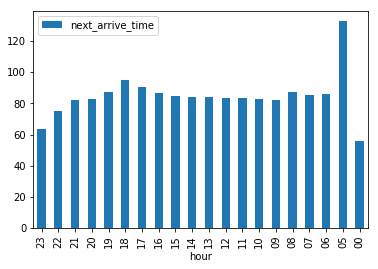

In [6]:
train_1[['hour','next_arrive_time']].groupby(['hour'], as_index=True).mean().sort_values(by='hour',ascending=False).plot.bar()

In [4]:
train_1.isna().sum()

date                0
route_nm            0
now_latitude        0
now_longitude       0
now_station         0
now_arrive_time     0
distance            0
next_latitude       0
next_longitude      0
next_arrive_time    0
dtype: int64

In [5]:
train_1.describe()

now_latitude  now_longitude       distance  next_latitude  \
count  210457.000000  210457.000000  210457.000000  210457.000000   
mean       33.434528     126.603451     490.256100      33.434711   
std         0.102350       0.123961     520.563932       0.102224   
min        33.244382     126.473300      97.000000      33.244382   
25%        33.325283     126.523900     291.000000      33.325283   
50%        33.484667     126.551050     384.000000      33.484860   
75%        33.500197     126.650322     542.000000      33.500228   
max        33.556167     126.935188    7461.000000      33.556167   

       next_longitude  next_arrive_time  
count   210457.000000     210457.000000  
mean       126.603687         85.380824  
std          0.123838         85.051170  
min        126.473300          6.000000  
25%        126.524550         44.000000  
50%        126.551050         66.000000  
75%        126.650322        102.000000  
max        126.935188       2996.000000

In [6]:
train['now_station'].value_counts()

남국원(아라방면)           3361
아라주공아파트             3098
도호동                 3093
인다마을                3056
은남동                 2789
제원아파트               2728
동문로터리               2606
제주여자중고등학교(아라방면)     2474
삼무공원사거리             2363
청소년문화의집             2290
제주대학교병원             2281
제대마을                2232
아라초등학교              2215
한라병원                2192
탐라장애인 종합복지관         2166
연동주민센터              2106
제주도청 신제주로터리         2090
주공 3 4단지            2047
제주시청(광양방면)          2021
고산동산(광양방면)          1997
제주여자중고등학교(광양방면)     1939
제주중앙여자고등학교(아라방면)    1861
고산동산(아라방면)          1846
제주시청(아라방면)          1841
제주지방법원(아라방면)        1830
아랑조을거리 입구           1768
남녕고등학교              1566
평생학습관               1535
서귀포시 구 버스터미널        1514
제주지방법원(광양방면)        1486
                    ... 
신흥1번지                 82
고망난돌입구                80
태흥3리                  80
난산입구(성산기상대)           77
토산관광지구입구              77
수농원                   76
고성리 성산농협              72
효돈농협하나로마트             72
화성농장                  70


In [7]:
# test.head(30)

id        date   route_id    vh_id route_nm  now_latitude  \
0   210457  2019-10-29  405136001  7997025    360-1     33.457724   
1   210458  2019-10-29  405136001  7997025    360-1     33.458783   
2   210459  2019-10-29  405136001  7997025    360-1     33.478867   
3   210460  2019-10-29  405136001  7997025    360-1     33.478850   
4   210461  2019-10-29  405136001  7997025    360-1     33.480700   
5   210462  2019-10-29  405136001  7997025    360-1     33.482077   
6   210463  2019-10-29  405136001  7997025    360-1     33.482142   
7   210464  2019-10-29  405136001  7997025    360-1     33.483446   
8   210465  2019-10-29  405136001  7997025    360-1     33.488046   
9   210466  2019-10-29  405136001  7997025    360-1     33.489633   
10  210467  2019-10-29  405136001  7997025    360-1     33.489900   
11  210468  2019-10-29  405136001  7997025    360-1     33.487531   
12  210469  2019-10-29  405136001  7997025    360-1     33.485822   
13  210470  2019-10-29  405136001  7997025    360-1     33.485662   
14  210471  2019-10-29  405136001  7997025    360-1     33.487317   
15  210472  2019-10-29  405136001  7997025    360-1     33.500045   
16  210473  2019-10-29  405136001  7997025    360-1     33.499930   
17  210474  2019-10-29  405136001  7997025    360-1     33.499793   
18  210475  2019-10-29  405136001  7997025    360-1     33.499683   
19  210476  2019-10-29  405136001  7997025    360-1     33.499789   
20  210477  2019-10-29  405136001  7997025    360-1     33.500017   
21  210478  2019-10-29  405136001  7997025    360-1     33.499560   
22  210479  2019-10-29  405136001  7997025    360-1     33.496007   
23  210480  2019-10-29  405136001  7997025    360-1     33.493109   
24  210481  2019-10-29  405136001  7997025    360-1     33.489414   
25  210482  2019-10-29  405136001  7997025    360-1     33.484860   
26  210483  2019-10-29  405136001  7997025    360-1     33.479705   
27  210484  2019-10-29  405136001  7997025    360-1     33.476533   
28  210485  2019-10-29  405136001  7997025    360-1     33.473655   
29  210486  2019-10-29  405136001  7997025    360-1     33.471450   

    now_longitude       now_station now_arrive_time  distance  \
0      126.554014              제대마을             07시     333.0   
1      126.557353             제대아파트             07시     415.0   
2      126.483833       한라중학교/부영아파트             08시     417.0   
3      126.488350           대림2차아파트             08시     334.0   
4      126.489933         연동대림1차아파트             08시     550.0   
5      126.485355             케이티앤지             08시     199.0   
6      126.483213              롯데마트             08시     341.0   
7      126.480758               원노형             08시     185.0   
8      126.483112            남녕고등학교             08시     322.0   
9      126.486000              한라병원             08시     291.0   
10     126.488917           삼무공원사거리             08시     381.0   
11     126.489892             제원아파트             08시     267.0   
12     126.490897               은남동             08시     374.0   
13     126.494923               도호동             08시     321.0   
14     126.496617            연동주민센터             08시     455.0   
15     126.511035              동성마을             08시     354.0   
16     126.514863           제주버스터미널             08시     262.0   
17     126.517687              한국병원             08시     333.0   
18     126.521267           남서광마을입구             09시     232.0   
19     126.523759             남서광마을             09시     193.0   
20     126.525833       탐라장애인 종합복지관             09시     459.0   
21     126.529771        제주시청(아라방면)             09시     454.0   
22     126.532287        고산동산(아라방면)             09시     414.0   
23     126.535091      제주지방법원(아라방면)             09시     525.0   
24     126.538642  제주중앙여자고등학교(아라방면)             09시     642.0   
25     126.542928   제주여자중고등학교(아라방면)             09시     578.0   
26     126.543811         남국원(아라방면)             09시     355.0   
27     126.544283            아라초등학교             

In [8]:
# submission.head()

id  next_arrive_time
0  210457                 0
1  210458                 0
2  210459                 0
3  210460                 0
4  210461                 0

In [9]:
# train_1[["now_latitude", "now_longtitude"]].plot.scatter(x="now_latitude", y="now_longtitude", figsize=(8, 7), grid=True)

KeyError: "['now_longtitude'] not in index"

In [10]:
# import requests
# import json
# import pandas as pd
# from pandas.io.json import json_normalize
# import os

# import folium
# from folium import plugins
# print(folium.__version__)

0.5.0


In [11]:
# # 위도(latitude) 경도(longitude)


# map1 = folium.Map(location = [37.566535, 126.97796919999996], zoom_start = 15)

In [13]:
# for item in train_1.index:
#     lat = train_1.loc[item,'now_latitude']
#     long = train_1.loc[item,'now_longitude']
#     folium.CircleMarker([lat,long],
#                         popup = train_1.loc[item,'now_station'],
#                        color='blue',
#                        fill=True).add_to(map1)

KeyboardInterrupt: 

In [15]:
# coord = [35.1559361, 129.1384361]
# map_osm = folium.Map(location = coord)
# map_osm

In [16]:
# map_osm = folium.Map(location=coord, zoom_start=12)
# map_osm

In [17]:
# map_osm = folium.Map(location = coord, tiles = 'Stamen Toner')
# map_osm

In [14]:
# coord = [35.2335123, 129.0810047]

# map_osm = folium.Map(location=coord, zoom_start=12)

# folium.Marker(coord, popup='부산대학교', tooltip = '부산대학교 tooltip').add_to(map_osm) # 마커 생성 뒤 지도에 추가해주는 기능

# map_osm.save('index.html')

# map_osm

TypeError: __init__() got an unexpected keyword argument 'tooltip'

In [18]:
# coord = [35.2335123, 129.0810047]

# map_osm = folium.Map(location=coord, zoom_start=12)

# folium.Marker(coord, popup='부산대학교', tooltip = '부산대학교 tooltip').add_to(map_osm) # 마커 생성 뒤 지도에 추가해주는 기능

# map_osm.save('index.html')

# map_osm

TypeError: __init__() got an unexpected keyword argument 'tooltip'

In [ ]:
# # 유동인구 조사지점을 지도에 표시. 0, 1, 3번째 행 생략. 첫번째 시트만 읽어옴(sheet_name이 기본값)
# 조사지점 = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx', skiprow = [0, 1, 3])

# # 필요한 컬럼만 선택(조사지점명, X좌표, Y좌표)
# # 30개만 선택해서 지도에 Marker로 추가할 예정
# 조사지점30 = 조사지점[['조사지점명', 'X좌표', 'Y좌표']].head(30)
# 조사지점30.head(1)